In [236]:
import numpy as np 
from sklearn.linear_model import LinearRegression as LR 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 

import matplotlib.pyplot as plt 
import seaborn as sns 

#plt.style.use('seaborn-v0_8')
sns.set_style('darkgrid')
sns.set_palette('deep')
%config InlineBackend.figure_format = 'svg'

import tensorflow as tf 

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

# Model Evaluation and Selection 

A very important part of machine learning is to evaluate the performance of the model. 

A robust model is one that can generalize well to new data by avoiding underfitting and overfitting. In order to evaluate and validate a ML model or a neural network, a solid approach is to split the entire dataset into three subsets:

- Training set
- Cross-validation set (aka validation or development set) 
- Test set

We can take a look at different examples, such as regression and classification problems, as well as different architectures for neural networks.

## Regression

In [237]:
data = np.array([[1651.  ,  432.65],
       [1691.82,  454.94],
       [1732.63,  471.53],
       [1773.45,  482.51],
       [1814.27,  468.36],
       [1855.08,  482.15],
       [1895.9 ,  540.02],
       [1936.71,  534.58],
       [1977.53,  558.35],
       [2018.35,  566.42],
       [2059.16,  581.4 ],
       [2099.98,  596.46],
       [2140.8 ,  596.71],
       [2181.61,  619.45],
       [2222.43,  616.58],
       [2263.24,  653.16],
       [2304.06,  666.52],
       [2344.88,  670.59],
       [2385.69,  669.02],
       [2426.51,  678.91],
       [2467.33,  707.44],
       [2508.14,  710.76],
       [2548.96,  745.19],
       [2589.78,  729.85],
       [2630.59,  743.8 ],
       [2671.41,  738.2 ],
       [2712.22,  772.95],
       [2753.04,  772.22],
       [2793.86,  784.21],
       [2834.67,  776.43],
       [2875.49,  804.78],
       [2916.31,  833.27],
       [2957.12,  825.69],
       [2997.94,  821.05],
       [3038.76,  833.82],
       [3079.57,  833.06],
       [3120.39,  825.7 ],
       [3161.2 ,  843.58],
       [3202.02,  869.4 ],
       [3242.84,  851.5 ],
       [3283.65,  863.18],
       [3324.47,  853.01],
       [3365.29,  877.16],
       [3406.1 ,  863.74],
       [3446.92,  874.67],
       [3487.73,  877.74],
       [3528.55,  874.11],
       [3569.37,  882.8 ],
       [3610.18,  910.83],
       [3651.  ,  897.42]])

In [238]:
data.shape

(50, 2)

In [239]:
x = data[:, 0]
y = data[:, 1]

x.shape, y.shape

((50,), (50,))

In [240]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

x.shape, y.shape

((50, 1), (50, 1))

In [241]:
x

array([[1651.  ],
       [1691.82],
       [1732.63],
       [1773.45],
       [1814.27],
       [1855.08],
       [1895.9 ],
       [1936.71],
       [1977.53],
       [2018.35],
       [2059.16],
       [2099.98],
       [2140.8 ],
       [2181.61],
       [2222.43],
       [2263.24],
       [2304.06],
       [2344.88],
       [2385.69],
       [2426.51],
       [2467.33],
       [2508.14],
       [2548.96],
       [2589.78],
       [2630.59],
       [2671.41],
       [2712.22],
       [2753.04],
       [2793.86],
       [2834.67],
       [2875.49],
       [2916.31],
       [2957.12],
       [2997.94],
       [3038.76],
       [3079.57],
       [3120.39],
       [3161.2 ],
       [3202.02],
       [3242.84],
       [3283.65],
       [3324.47],
       [3365.29],
       [3406.1 ],
       [3446.92],
       [3487.73],
       [3528.55],
       [3569.37],
       [3610.18],
       [3651.  ]])

In [242]:
import pandas as pd

In [243]:
df_reg = pd.DataFrame({'Data': data[:, 0], 'Target': data[:, 1]})

In [244]:
df_reg

,Data,Target
0,1651.00,432.65
1,1691.82,454.94
2,1732.63,471.53
3,1773.45,482.51
4,1814.27,468.36
5,1855.08,482.15
6,1895.90,540.02
7,1936.71,534.58
8,1977.53,558.35
9,2018.35,566.42


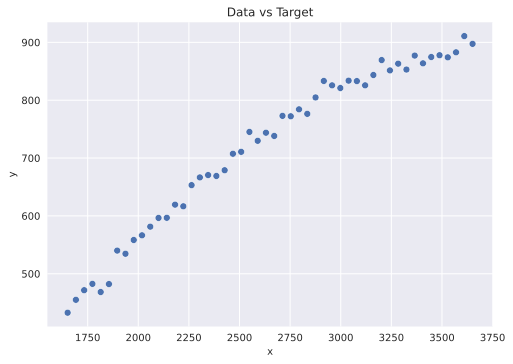

In [245]:
sns.scatterplot(data=df_reg, markers='X', x='Data', y='Target')
#plt.legend(title = 'points', labels=['target', 'data'], frameon=True, framealpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data vs Target')
plt.show()

## Split the dataset into training, cross-validation and test sets

+ **training set** - used to train the model
+ **cross-validation set** - used to evaluate the different model configurations, for example, you can use this to decide on what polynomial features tp add to your dataset
+ **test set** - used to give an estimate of the model's performance against new data

Fortunately, scikit-learn has a function that can split the dataset into these three subsets. The function is called `train_test_split` and it is part of the `model_selection` module. 

In [246]:
# Get 60% of the dataset as the training set and store the remaining 40% in temporary variables
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the remaining 40% (stored in x_, y_) into a half for cross validation and a half for the actual test set

x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# delete tmp variables

del x_, y_ 

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


Let's make a new dataframe with the split data. 

In [247]:
df_train = pd.DataFrame({'x_Train': x_train[:, 0], 'y_Train': y_train[:, 0]})
df_cv = pd.DataFrame({'x_Cross_Validation': x_cv[:, 0], 'y_Cross_Validation': y_cv[:, 0]})
df_test = pd.DataFrame({'x_Test': x_test[:, 0], 'y_Test': y_test[:, 0]})

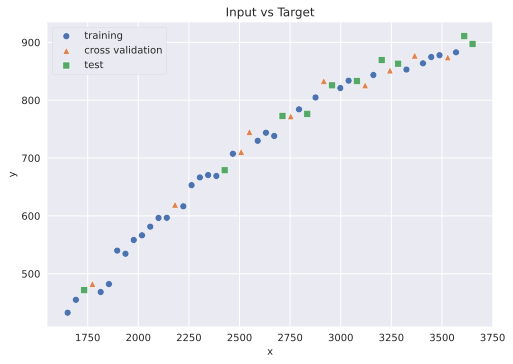

In [248]:
sns.scatterplot(data=df_train, x='x_Train', y='y_Train', marker='o')
sns.scatterplot(data=df_cv, x='x_Cross_Validation', y='y_Cross_Validation', marker='^')
sns.scatterplot(data=df_test, x='x_Test', y='y_Test', marker='s')
plt.title('Input vs Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', labels=['training', 'cross validation', 'test'], frameon=True, framealpha=1)
plt.show()

## Fit a linear regression model

### Feature scaling 

Scikit-learn has a `StandardScaler` class that can be used to scale the features. This scaler will subtract the mean and divide by the standard deviation.



In [249]:
scaler_linear = StandardScaler() # init the class with an instance 

X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


In [250]:
df_train['x_Train_scaled'] = X_train_scaled

In [251]:
df_train

,x_Train,y_Train,x_Train_scaled
0,3324.47,853.01,1.427161
1,2344.88,670.59,-0.276908
2,3487.73,877.74,1.711164
3,2630.59,743.80,0.220105
4,2589.78,729.85,0.149113
5,1814.27,468.36,-1.199944
6,2997.94,821.05,0.859138
7,2222.43,616.58,-0.489919
8,2875.49,804.78,0.646127
9,2059.16,581.40,-0.773939


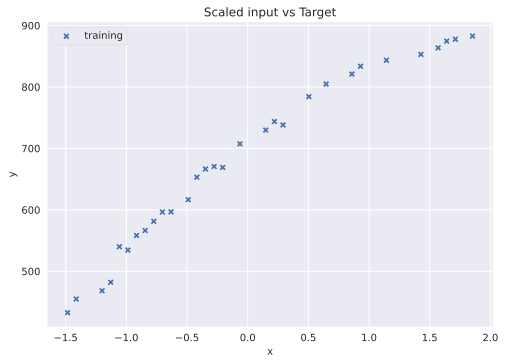

In [252]:
sns.scatterplot(data=df_train, x='x_Train_scaled', y='y_Train', marker='X')
#sns.scatterplot(data=df_cv, x='x_Cross_Validation', y='y_Cross_Validation', marker='^')
#sns.scatterplot(data=df_test, x='x_Test', y='y_Test', marker='s')
plt.title('Scaled input vs Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', labels=['training', 'cross validation', 'test'], frameon=True, framealpha=1)
plt.show()

### Train the model

We can use the `LinearRegression` class from scikit-learn to train the model. Other linear regressors are also available, such as `Ridge` and `Lasso`.

In [253]:
linear_model = LR() # init the class with an instance 

# Train 

linear_model.fit(X_train_scaled, y_train)

LinearRegression()

### Evaluate the model 

We can evaluate the model using the mean squared error (MSE) on the training set and the cross-validation set. 

The MSE is defined as: 

$$ \displaystyle J_{train}(\vec{w}, b) = \frac{1}{2m_{train}} \left[ \sum_{i=1}^{m_{train}} \left(f_{\vec{w}, b}(\vec{x}^{(i)}_{train}) - y^{(i)}_{train}\right)^2 \right]$$

In [254]:
yhat_train = linear_model.predict(X_train_scaled)

mse_train = MSE(y_train, yhat_train) / 2

In [255]:
mse_train

406.18142643101237

The MSE for the cross-validation set is defined as:

$$ \displaystyle J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}} \left[ \sum_{i=1}^{m_{cv}} \left(f_{\vec{w}, b}(\vec{x}^{(i)}_{cv}) - y^{(i)}_{cv}\right)^2 \right]$$

where $m_{train}$ and $m_{cv}$ are the number of training and cross-validation examples, respectively.

Before that, it's important to scale the features of the cross-validation set as well, with a little caveat. 

In order to scale the cross validation set, you need to use the mean and standard deviation of the training set. This is because you don't want to use any information from the cross-validation set to train the model. 

We can use the `transform` method of the scaler to scale the cross-validation set, rather than the `fit_transform` method. 

In [256]:
# Scale the cross validation set using the mean and standard deviation of the training set

X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set 

yhat_cv = linear_model.predict(X_cv_scaled)

# Evaluate MSE 

mse_cv = MSE(y_cv, yhat_cv) / 2

mse_cv


Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85


551.7633686764407

## Adding polynomial features 

The scattered data points hint that there's a slowly flattening of a possible fit curve at greater values of $x$. A polynomial fit might be a good choice.

### Create the additional feautures

We can use the `PolynomialFeatures` class from scikit-learn to create the additional features. 

In [257]:
# init the class with an instance 

poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set 

X_train_mapped = poly.fit_transform(x_train)

# left column is x and right column is x²
X_train_mapped[:5]

array([[3.32447000e+03, 1.10521008e+07],
       [2.34488000e+03, 5.49846221e+06],
       [3.48773000e+03, 1.21642606e+07],
       [2.63059000e+03, 6.92000375e+06],
       [2.58978000e+03, 6.70696045e+06]])

We can scale the input features using the `StandardScaler` class, as we did before.

In [258]:
# init the class with an instance 

scaler_poly = StandardScaler()

# compute mean and standard deviation of the new training set, then transform it 

X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

X_train_mapped_scaled[:5]

array([[ 1.42716085,  1.47236975],
       [-0.27690826, -0.36461578],
       [ 1.71116367,  1.84024054],
       [ 0.22010538,  0.10558969],
       [ 0.14911337,  0.03512103]])

We can now train the model, while taking into account the required transformations, as we did before.

In [259]:
# Init the class with an instance 

model = LR()

# train 

model.fit(X_train_mapped_scaled, y_train)

# compute mse for the training set 

yhat_train_poly = model.predict(X_train_mapped_scaled)
print(f'Training MSE: {MSE(y_train, yhat_train_poly)/2}')

# add the polynomial features to the cross validation set 

X_cv_mapped = poly.transform(x_cv)

# scale the cross validation set using mean and std from the training set 

X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# compute mse for the cross validation set 

yhat_cv_poly = model.predict(X_cv_mapped_scaled)
print(f'Cross Validation MSE: {MSE(y_cv, yhat_cv_poly)/2}')

Training MSE: 49.115763074720526
Cross Validation MSE: 87.694664384358


### Model evaluation over different polynomial degrees 

We can now evaluate the model over different polynomial degrees. We might be tempted to assume that a higher polynomial degree will always result in a better fit. However, this is not always the case, since a higher polynomial degree might result in overfitting, as we know. 

We used the MSE to evaluate the model and we noticed a decrease in the MSE for the second order. We could expect a similar decrease for higher orders, but in general we will encounter an increase in the MSE after a certain order.

We can evaluate the function $f_{\vec{w}, b}$ over different polynomial degrees and plot the MSE vs the polynomial degree, for both the training set and the cross-validation set. 

+ $$ f_{\vec{w}, b}(\vec{x}) = w_1 x + b $$
+ $$ f_{\vec{w}, b}(\vec{x}) = w_1 x + w_2 x^2 + b $$
+ $$ f_{\vec{w}, b}(\vec{x}) = w_1 x + w_2 x^2 + w_3 x^3 + b $$
  $$\vdots$$
+ $$ f_{\vec{w}, b}(\vec{x}) = w_1 x + w_2 x^2 + w_3 x^3 + \cdots + w_{10} x^{10} + b $$

Let's evaluate the first 10 polynomial degrees. 

In [260]:
# Init lists, models and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# loop over 10 times and add a higher degree polynomial per iteration

for deg in range(1, 11):

    # add poly feature to the training set
    poly = PolynomialFeatures(deg, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)

    # scale the training set 
    scaler_poly = StandardScaler() # init the class with an instance 
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # create and train the model 
    model = LR() # init the class with an instance 
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)

    # compute the MSE for the training set
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = MSE(y_train, yhat)/2
    train_mses.append(train_mse)

    # add polynomial features and scale the cross validation set with the mean and std of the training set 
    poly = PolynomialFeatures(deg, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # compute the MSE for the cross-validation set
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = MSE(y_cv, yhat)/2
    cv_mses.append(cv_mse)


In [261]:
degrees = range(1, 11)

In [262]:
df_poly = pd.DataFrame({'degree': degrees, 'train_mse': train_mses, 'cv_mse': cv_mses})

In [263]:
df_poly

,degree,train_mse,cv_mse
0,1,406.181426,551.763369
1,2,49.115763,87.694664
2,3,47.619431,81.144265
3,4,47.149446,79.424415
4,5,47.145456,79.581898
5,6,41.386796,98.740377
6,7,39.252744,99.321031
7,8,38.984574,99.045350
8,9,37.974955,109.586987
9,10,37.038624,121.858072


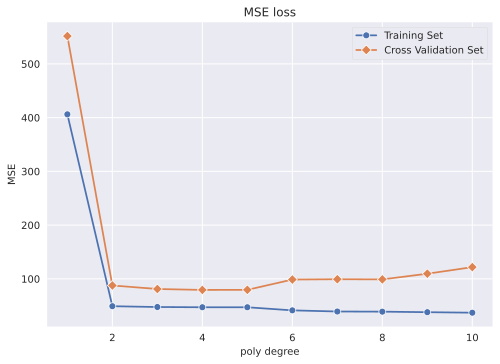

In [264]:
sns.lineplot(data=df_poly, x='degree', y='train_mse', marker='o', label='Training Set')
sns.lineplot(data=df_poly, x='degree', y='cv_mse', marker='D', label='Cross Validation Set')
plt.title('MSE loss')
plt.xlabel('poly degree')
plt.ylabel('MSE')
plt.legend(loc='upper right', frameon=True, framealpha=1)
plt.show()

As we can notice, there's a diminishing return for the MSE after the fifth order.

### Choosing the best model

A solid approach is to choose the model that has both the lowest MSE on the training set and the cross-validation set. The implication is that it is able to learn from your training set without overfitting.

In [265]:
degree = np.argmin(cv_mses) + 1 # adding 1 to account for the fact that the index starts at 0

print(f'Lowest CV MSE is found in the model with degree = {degree}')

Lowest CV MSE is found in the model with degree = 4


### Test set evaluation and generalization error

We can now evaluate the model on the test set, to get an estimate of the generalization error. The transformation of the test set is done in the same way as the cross-validation set, with the mean and standard deviation of the training set.

In [266]:
# add poly features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# scale the test set
X_test_mapped_scaled = scalers[degree - 1].transform(X_test_mapped)

# compute the MSE for the test set
yhat = models[degree - 1].predict(X_test_mapped_scaled)
test_mse = MSE(y_test, yhat)/2 

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")


Training MSE: 47.15
Cross Validation MSE: 79.42
Test MSE: 104.64


# Neural Networks 

The same concept can be used when choosing the best neural network architecture. Let's create the following three neural networks:

+ $$ \vec{x} \rightarrow \boxed{a_1 (25 \ dense, \ ReLU) \rightarrow a_2 (15 \ dense, \ ReLU)} \rightarrow a_3 (1 \ dense, \ sigmoid) \rightarrow \hat{y} $$
+ $$ \vec{x} \rightarrow \boxed{a_1 (20 \ dense, \ ReLU) \rightarrow a_2 (12 \ dense, \ ReLU) \rightarrow a_3 (12 \ dense, \ ReLU) \rightarrow a_4 (20 \ dense, \ ReLU)} \rightarrow a_5 (1 \ dense, \ sigmoid) \rightarrow \hat{y} $$
+ $$ \vec{x} \rightarrow \boxed{a_1 (32 \ dense, \ ReLU) \rightarrow a_2 (16 \ dense, \ ReLU) \rightarrow a_3 (8 \ dense, \ ReLU) \rightarrow a_4 (4 \ dense, \ ReLU) \rightarrow a_5 (12 \ dense, \ ReLU)} \rightarrow a_6 (1 \ dense, \ sigmoid) \rightarrow \hat{y} $$

## Prepare the data 

We will use the same training, cross-validation and test sets as before. Adding polynomial features is not necessary for this example, as the neural network will be able to learn the non-linearities. 

In [267]:
# creating the features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv) # using transform instead of fit_transform will use the mean and std from the training set
X_test_mapped = poly.transform(x_test)

Remember that scaling the features helps the gradient descent algorithm to converge faster. This is also true for the optimized Adam algorithm.

In [268]:
# scaling the features using the z-score (in StandardScaler)
scaler = StandardScaler() # init an instance of the class
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

## Build and train the neural networks

We can use the `build_models` custom function to build the three neural networks. The best approach is to use the ReLU activation function for the hidden layers and, instead of using the sigmoid activation function, we can use the linear activation function, which we then pass through a sigmoid function, in order to turn the model outputs into probabilities. 

Bear in mind that this is equivalent to using the sigmoid activation function for the output layer, but it is more numerically stable when using the `from_logits=True` argument in TensorFlow.

In [269]:

from utils import build_models

In [270]:
# Init the lists for the neural networks' errors
nn_train_mses = []
nn_cv_mses = []

# build the models
nn_models = build_models() # init the class with an instance

# loop over each model 
for model in nn_models:

    # setup the loss and optimizer
    model.compile(
        loss = 'mse', 
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f'Training {model.name}...')

    # train the model 
    model.fit(
        X_train_mapped_scaled, y_train, epochs = 300, verbose = 0
    )

    print('Done!\n')

    # record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = MSE(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # record the cross-validation  MSEs
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = MSE(y_cv, yhat) / 2 
    nn_cv_mses.append(cv_mse)

# print the results
print('RESULTS: ')
for model_num in range(len(nn_train_mses)): 
    print(
        f'Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, ' +
        f'Cross Validation MSE: {nn_cv_mses[model_num]:.2f}'
    )


Training model_1...
Done!

1/1 [==============================] - 0s 12ms/step
Training model_2...
Done!

1/1 [==============================] - 0s 11ms/step
Training model_3...
Done!

1/1 [==============================] - 0s 11ms/step
RESULTS: 
Model 1: Training MSE: 406.18, Cross Validation MSE: 551.76
Model 2: Training MSE: 46.58, Cross Validation MSE: 69.71
Model 3: Training MSE: 406.18, Cross Validation MSE: 551.76


As previously mentioned, the most sensible choice is to pick the model with the lowest MSE on both the training and cross-validation sets.

In [272]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = MSE(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 [==============================] - 0s 14ms/step
Selected Model: 2
Training MSE: 46.58
Cross Validation MSE: 69.71
Test MSE: 95.90


## Classification

We will now load a dataset for a binary classification task. It has 200 examples and 2 input features $x_1$ and $x_2$. The target variable is $y$, which is either 0 or 1.

## Loading the dataset

In [275]:
df_bc = pd.read_csv('data/Files/data_w3_ex2.csv')

In [276]:
df_bc

,x_1,x_2,y
0,1000.000000,1457.286432,0.0
1,1045.226131,1005.025126,0.0
2,1090.452261,854.271357,0.0
3,1135.678392,2562.814070,0.0
4,1180.904523,4623.115578,0.0
...,...,...,...
195,9819.095477,3341.708543,1.0
196,9864.321608,3442.211055,1.0
197,9909.547739,1809.045226,1.0
198,9954.773869,3517.587940,1.0


In [279]:
# split the inputs and outputs into separate arrays
x_bc = df_bc.values[:, :-1]
y_bc = df_bc.values[:, -1]

# convert into 2-D arrays (x is already 2D)
y_bc = np.expand_dims(y_bc, axis=1)

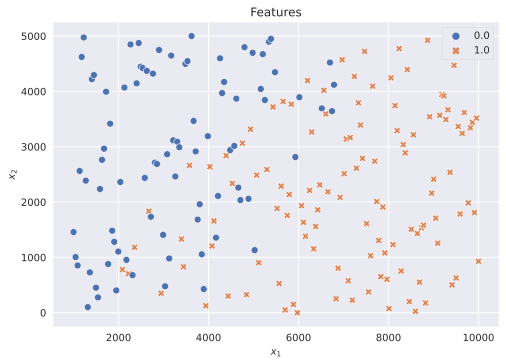

In [287]:
# let's plot the dataframe

sns.scatterplot(data=df_bc, x='x_1', y='x_2', style='y', hue='y')
plt.title('Features')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper right', frameon=True, framealpha=1)
plt.show()

## Split the dataset into training, cross-validation and test sets

We can use the `train_test_split` function from scikit-learn to split the dataset into training, cross-validation and test sets.

In [288]:
# get 60% of the set as the training set, the rest will end up in tmp variables 

x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# split the tmp variables into 50% for cross-validation and 50% for test

x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# delete tmp variables 

del x_, y_ 

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


## Error evaluation for classification models 

We previously used the MSE to evaluate the performance of the regression models. For classification models, we can achieve a similar metric by getting the fraction of the data that the model misclassifies. 

For instance, if your model makes 2 wrong predictions out of 5, then the error is 40%. 

In [289]:
# sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# apply a threshold to the model output
predictions = np.where(probabilities >= 0.5, 1, 0) # 1 above 0.5, else 0

# ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# init counter for misclassified data
misclassified = 0

# get number of predictions 
num_predictions = len(predictions)

# loop over each prediction 
for i in range(num_predictions):

    # check if it matches the ground truth
    if predictions[i] != ground_truth[i]: 
        misclassified += 1 # increase count

# compute the fraction of the misclassified data

fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


## Build and train the neural network

We can use the `build_model` custom function to build the neural network instances. 

The recommended approach is still that of using the ReLU activation function for the hidden layers and the linear activation function for the output layer, which we then pass through a sigmoid function, in order to turn the model outputs into probabilities. 

Once again, this is equivalent to using the sigmoid activation function for the output layer, but it is more numerically stable when using the `from_logits=True` argument in TensorFlow.

In [290]:
# init lists
nn_train_error = []
nn_cv_error = []

# build the model
models_bc = build_models()

# loop over each model 
for model in models_bc: 

    # setup loss function and optimizer
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
    )

    print(f'Training {model.name}...')

    # train the model 
    model.fit(
        x_bc_train, y_bc_train, 
        epochs=200, 
        verbose=0
    )

    print('Done!\n')

    # set a threshold for classification
    threshold = 0.5

    # record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train)
    yhat = tf.math.sigmoid(yhat) # used the linear activation output so we need to pass through a sigmoid function to get probabilities
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # record the fraction of misclassified examples for the cross-validation set

    yhat = model.predict(x_bc_cv)
    yhat = tf.math.sigmoid(yhat) # used the linear activation output so we need to pass through a sigmoid function to get probabilities
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model_1...
Done!

2/2 [==============================] - 0s 1ms/step
Training model_2...
Done!

2/2 [==============================] - 0s 1ms/step
Training model_3...
Done!

2/2 [==============================] - 0s 981us/step
Model 1: Training Set Classification Error: 0.15000, CV Set Classification Error: 0.17500
Model 2: Training Set Classification Error: 0.15000, CV Set Classification Error: 0.05000
Model 3: Training Set Classification Error: 0.30833, CV Set Classification Error: 0.30000


Just like before, we can pick the model with the lowest error on both the training and cross-validation sets.

In [291]:
# Select the model with the lowest error
model_num = 2

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 [==============================] - 0s 1ms/step
Selected Model: 2
Training Set Classification Error: 0.1500
CV Set Classification Error: 0.0500
Test Set Classification Error: 0.1250
